# Featurize real data

In [3]:
import os
import sys 
sys.path.append("/Users/johnzhou/research/decision-making")

import numpy as np
from scipy.optimize import minimize
import seaborn as sns

from src.data.real_data import DynamicForagingData
from src.data.environments import DynamicForagingTask
from src.data.generate_synth_data import SIGMOID_PARAM_BOUNDS
from src.data.experiments import RealExperiment
from src.utils import blockify, build_config, normalize_choice_block_side, average_choice_blocks, truncate_blocks

In [6]:
directory = "/Users/johnzhou/research/decision-making/data/real/dynamic_foraging"
filenames = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filenames.append(f)
    print(f)

/Users/johnzhou/research/decision-making/data/real/dynamic_foraging/MR17_DynamicForaging_20221006_160204.mat
/Users/johnzhou/research/decision-making/data/real/dynamic_foraging/MR16_DynamicForaging_20221011_132928.mat
/Users/johnzhou/research/decision-making/data/real/dynamic_foraging/MR16_DynamicForaging_20221006_152352.mat
/Users/johnzhou/research/decision-making/data/real/dynamic_foraging/MR15_DynamicForaging_20221007_160954.mat
/Users/johnzhou/research/decision-making/data/real/dynamic_foraging/MR17_DynamicForaging_20221007_164236.mat
/Users/johnzhou/research/decision-making/data/real/dynamic_foraging/MR16_DynamicForaging_20221012_110414.mat
/Users/johnzhou/research/decision-making/data/real/dynamic_foraging/MR18_DynamicForaging_20221011_141239.mat
/Users/johnzhou/research/decision-making/data/real/dynamic_foraging/MR15_DynamicForaging_20221011_132938.mat
/Users/johnzhou/research/decision-making/data/real/dynamic_foraging/MR15_DynamicForaging_20221010_135246.mat
/Users/johnzhou/res

In [7]:
choice_blocks = []
num_blocks = 0

for filename in filenames:
    try:
        expt = RealExperiment(filename, task_type=DynamicForagingTask)
    except ValueError:
        print(f"Failed to load {filename}")
        continue
    
    blocks = expt.blocks
    num_blocks += len(blocks)
    actions = expt.action_history
    rewards = expt.reward_history
    blocked_actions = blockify(expt.blocks, actions)
    blocked_rewards = blockify(expt.blocks, rewards)
    normalized_actions = [normalize_choice_block_side(blocked_actions[block_idx], blocks[block_idx][0])
                          for block_idx in range(len(blocks))]
    truncated_actions = truncate_blocks(normalized_actions)
    
    for choice_block in truncated_actions:
        if len(choice_block) < 15:
            continue
        else:
            choice_blocks.append(choice_block)        


Failed to load /Users/johnzhou/research/decision-making/data/real/dynamic_foraging/real_trial_feats.npy
Failed to load /Users/johnzhou/research/decision-making/data/real/dynamic_foraging/real_sig_feats.npy
15


In [9]:
choice_blocks = np.array(choice_blocks)
print(choice_blocks.shape)

np.save(f"{directory}/real_trials.npy", choice_blocks)

(220, 15)


[0.23760502 0.42199945 0.        ]


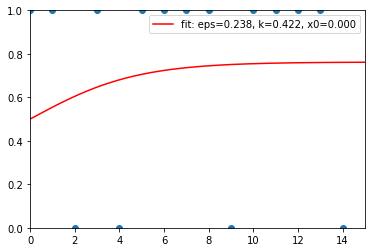

[0.44447493 1.4        0.        ]


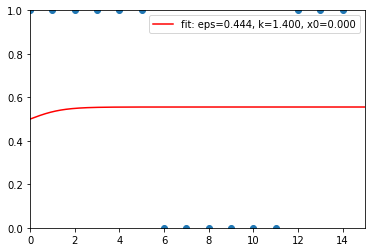

[0.5        1.3193979  1.05455751]


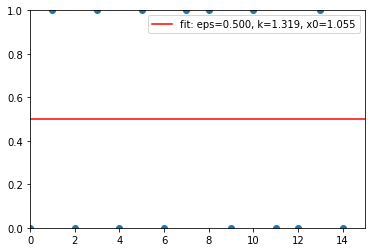

[0.         1.4        4.49999915]


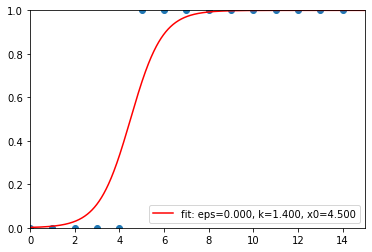

[0.24858452 0.83591054 0.        ]


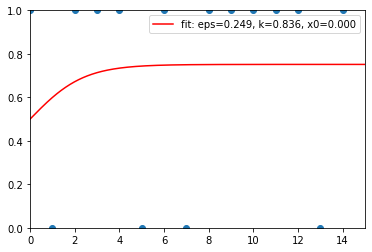

[0.34483872 1.4        5.67270521]


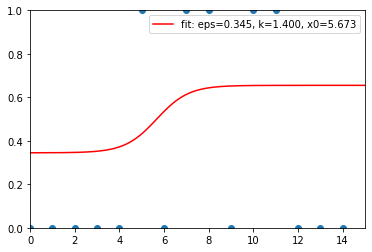

[0.24416306 0.35153964 3.41642805]


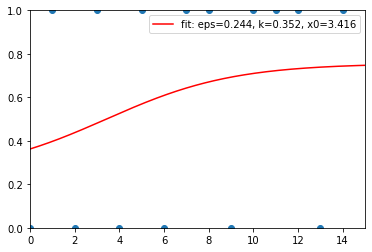

[0.         1.4        9.50000083]


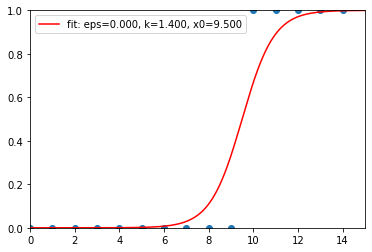

[0.28085343 1.4        8.48966249]


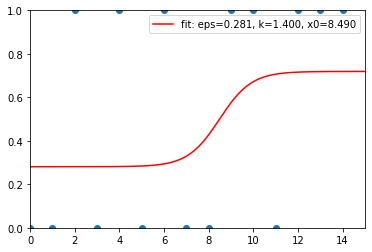

[0.         0.92386121 6.49999514]


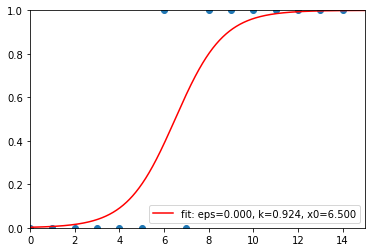

[0.05230925 1.4        0.4231625 ]


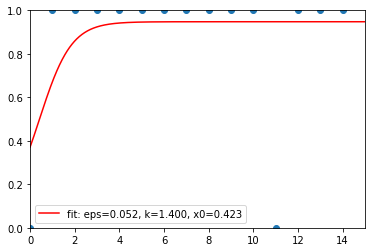

[ 0.1995934  1.4       15.       ]


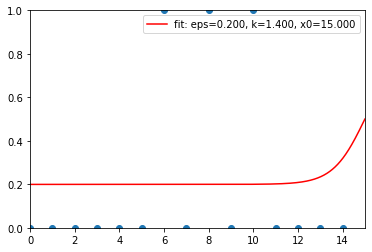

[0.21496634 1.4        0.        ]


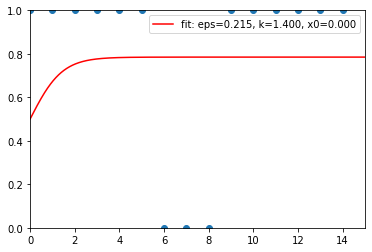

[0.05230925 1.4        0.4231625 ]


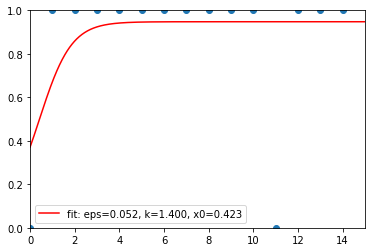

[ 0.          1.4        12.50344371]


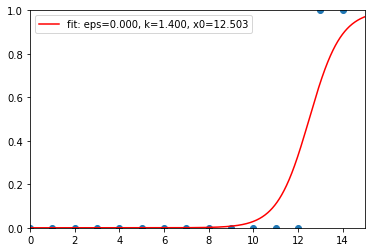

[0.12764443 1.4        1.47820166]


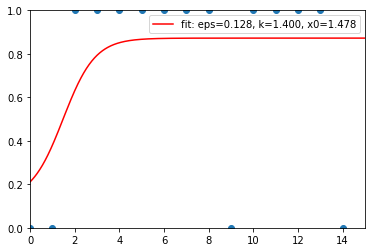

[0.28831538 1.4        0.27405802]


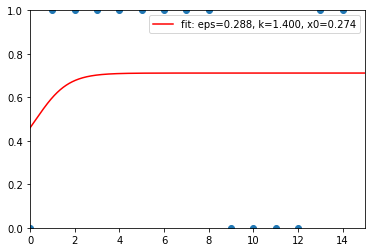

[0.28831161 1.4        0.27416993]


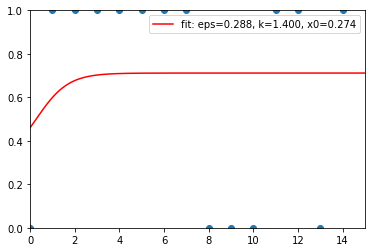

[0.         1.4        0.45056802]


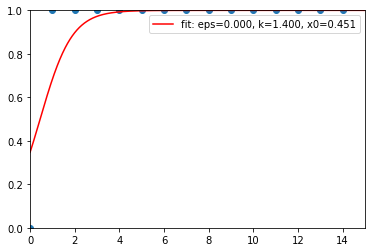

[0.13850823 1.4        0.        ]


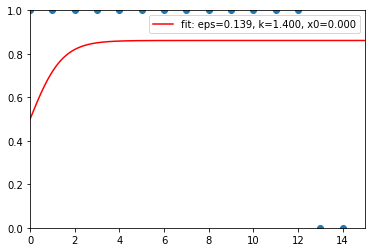

[0.42576657 0.6882988  0.        ]


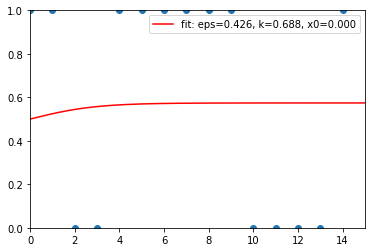

[0.5       1.4       1.8989761]


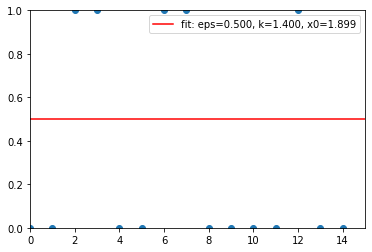

[ 0.   1.4 15. ]


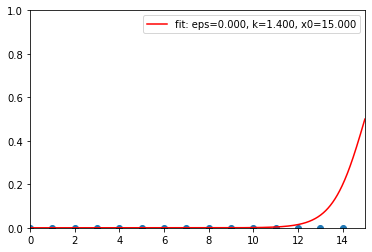

[0.34453704 1.4        2.61686802]


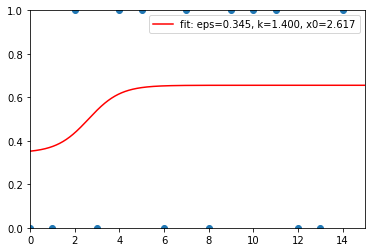

[0.         1.4        6.49999997]


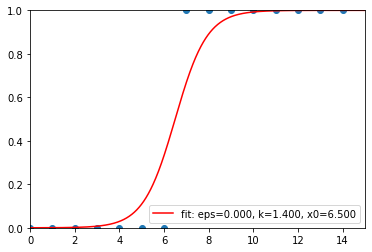

[0.28997353 1.4        1.46049204]


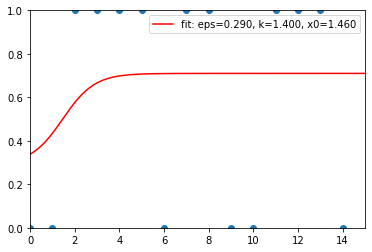

[0.         1.4        6.49999997]


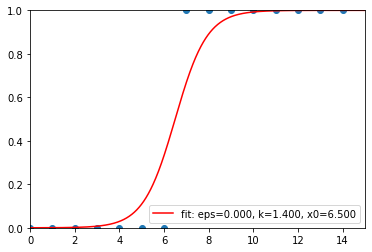

[0.13849923 1.4        0.        ]


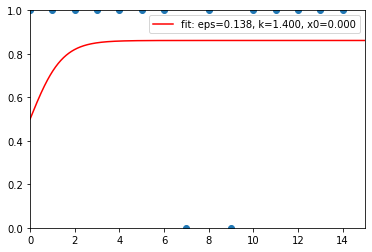

[0.         0.92377946 5.49995764]


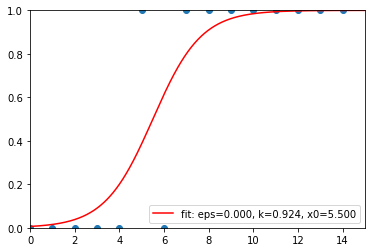

[0.13850823 1.4        0.        ]


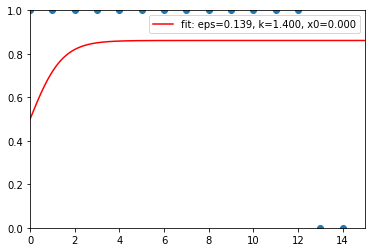

[0.20887618 1.4        1.46814912]


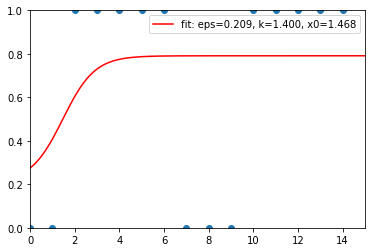

[0.5        1.30030055 0.        ]


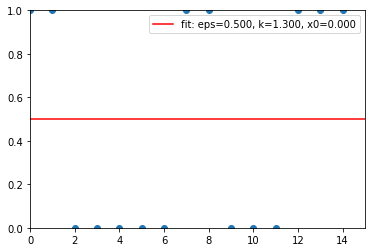

[0.05087407 1.4        0.45461773]


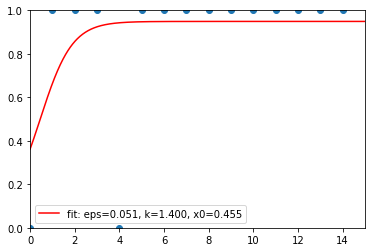

[0.08419684 1.07123602 2.4796707 ]


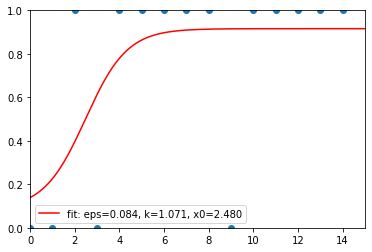

[0.         0.22025754 0.        ]


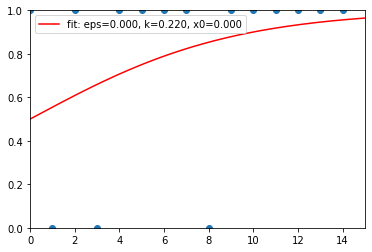

[0.         1.4        1.49655628]


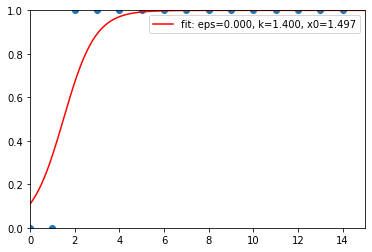

[0.13836831 1.4        0.        ]


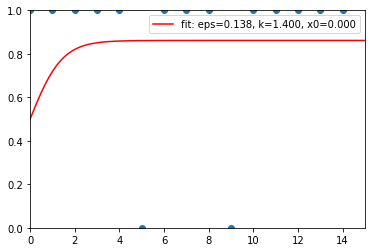

[0.         0.76328674 8.8724511 ]


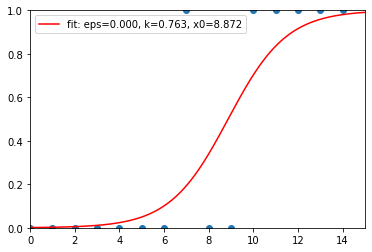

[0.         1.4        4.49999915]


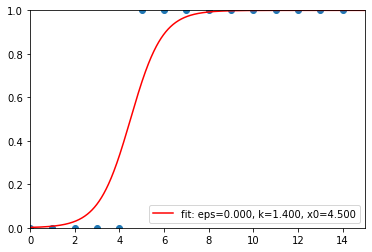

[0.         0.90921806 2.4881041 ]


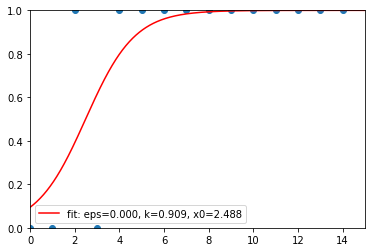

[0.         1.4        5.49999995]


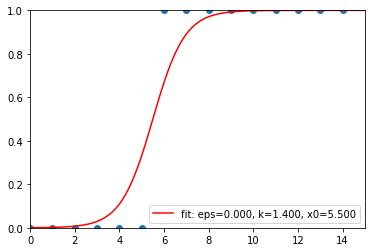

[0.        0.6388005 0.       ]


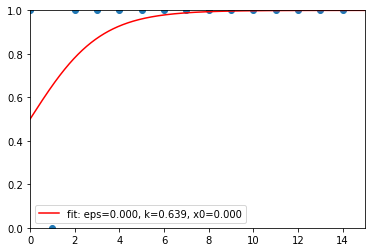

[0.         0.92377946 5.49995764]


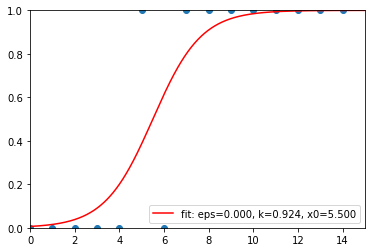

[0.07223784 0.95606105 8.40484172]


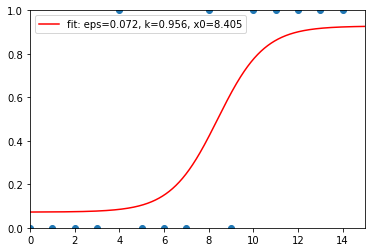

[0.         1.4        5.49999995]


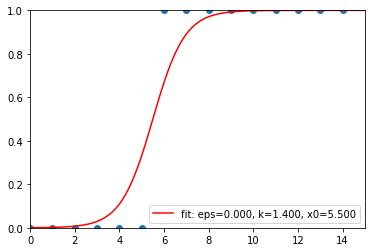

[0.20895531 1.4        1.46629216]


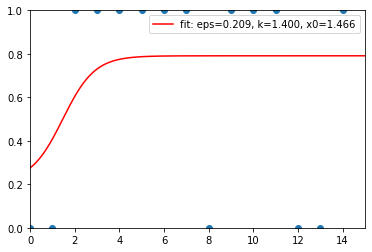

[0.  1.4 0. ]


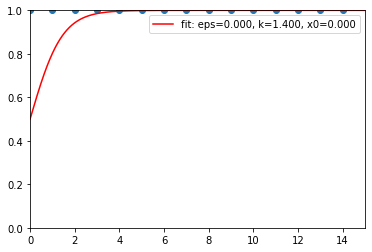

[0.17552033 1.21328301 2.50681606]


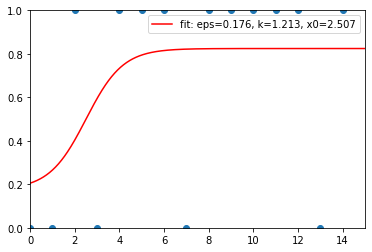

[0.2150113 1.4       0.       ]


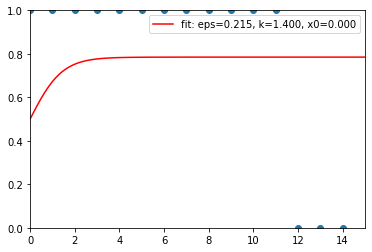

[0.06199665 1.4        0.        ]


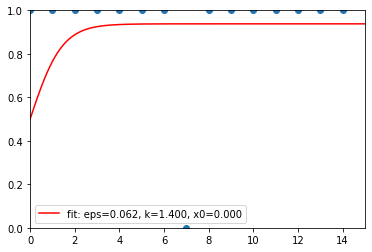

[0.04394162 1.4        3.49958039]


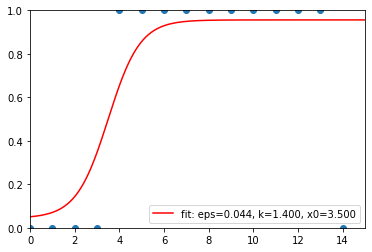

[0.         0.48202606 2.24789388]


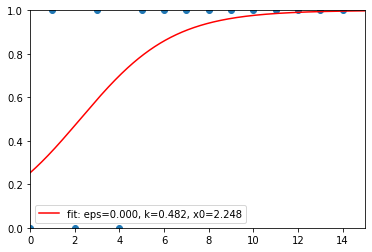

[0.5        1.4        1.78526892]


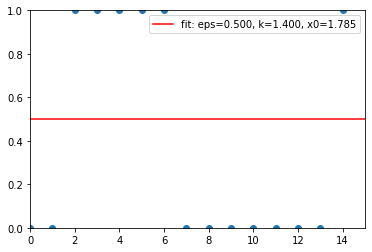

[0.2150113 1.4       0.       ]


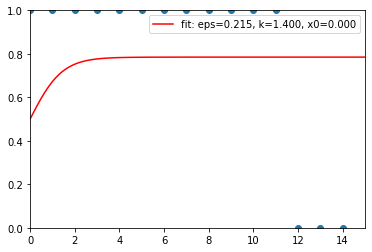

[0.12614247 1.4        2.5039263 ]


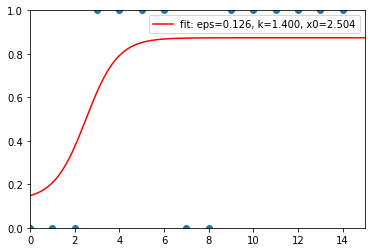

[0.         1.4        0.45056802]


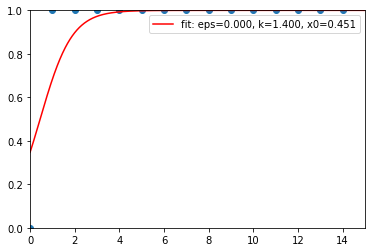

[0.04443029 1.4        2.49823486]


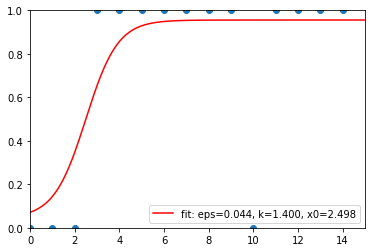

[0.5        1.4        0.76361202]


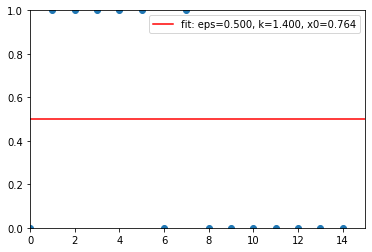

[0.  1.4 0. ]


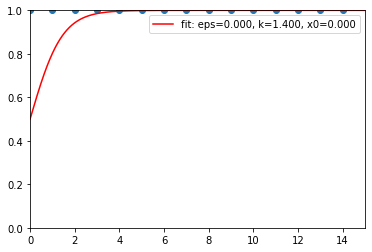

[0.         1.4        1.49655628]


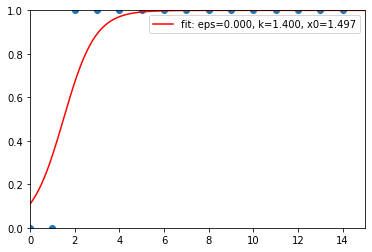

[0.         1.4        1.49655628]


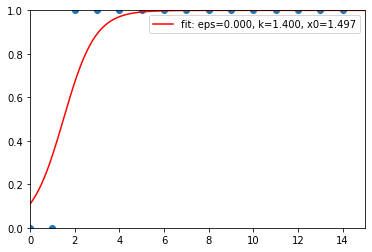

[0.20292653 1.4        4.37900535]


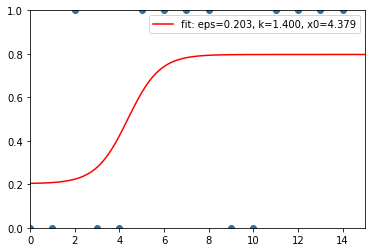

[0.         1.4        1.49655628]


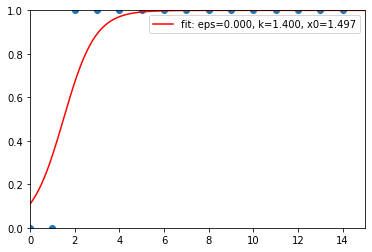

[0.36662469 1.4        1.56969964]


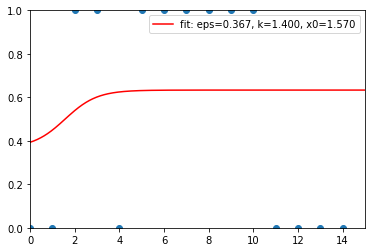

[0.         1.4        3.49998632]


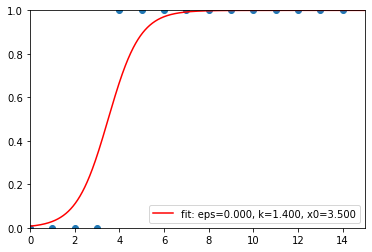

[0.         1.4        4.49999915]


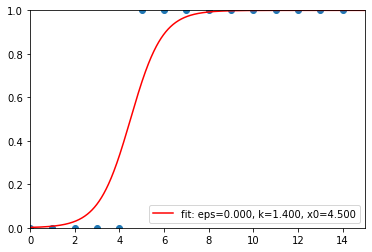

[0.         1.4        0.45056802]


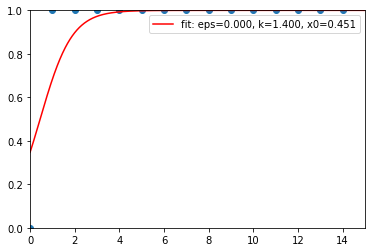

[0.5        1.4        0.76361202]


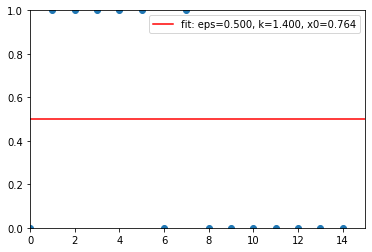

[0.05230932 1.4        0.42316078]


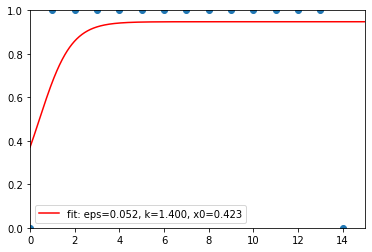

[0.         1.4        0.45056802]


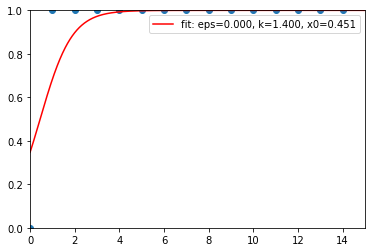

[0.04628164 1.4        1.49038812]


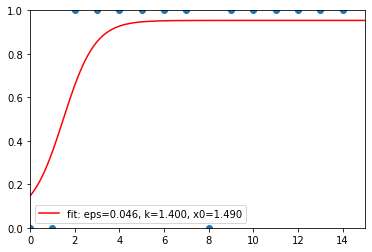

[ 0.   1.4 15. ]


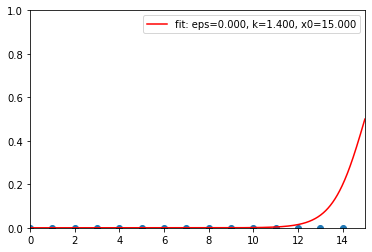

[0.         1.4        7.49999999]


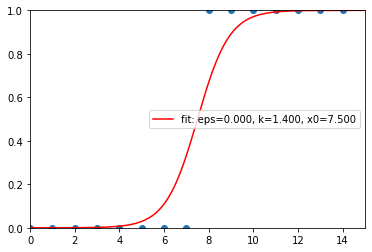

[0.06200513 1.4        0.        ]


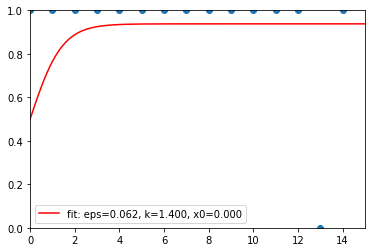

[ 0.05759671  1.4        15.        ]


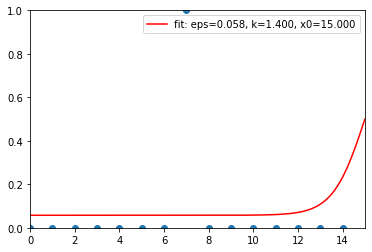

[0.        1.4       2.4997787]


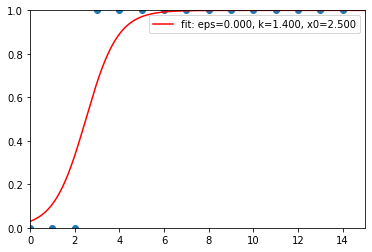

[0.         1.4        5.49999995]


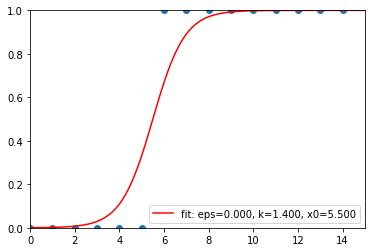

[0.         1.4        1.49655628]


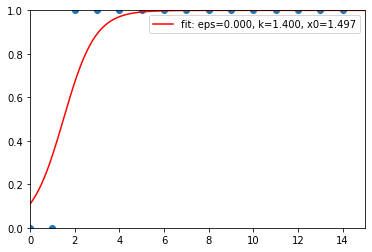

[0.         1.4        5.49999995]


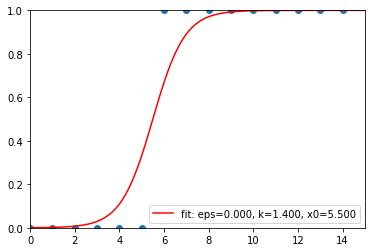

[0.         1.4        0.45056802]


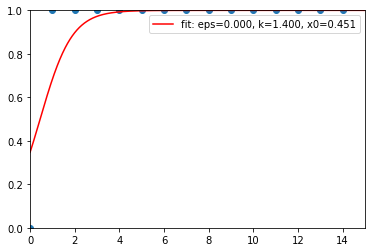

[0.        1.4       2.4997787]


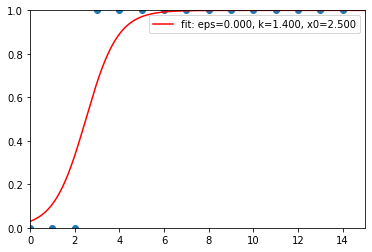

[0.         0.28425194 2.69247903]


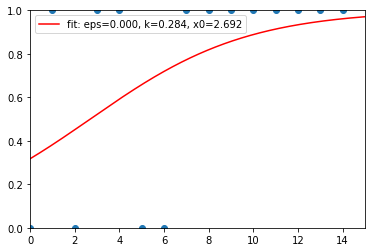

[0.         1.4        1.49655628]


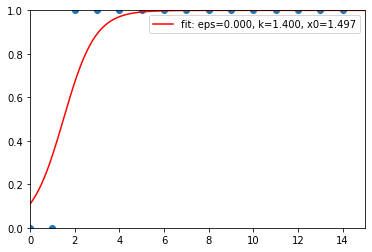

[0.         1.4        0.45056802]


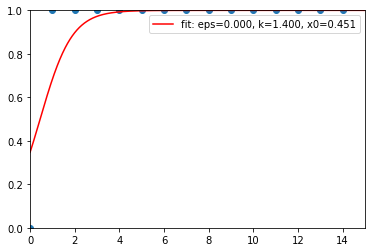

[0.08495368 1.00353174 1.38051731]


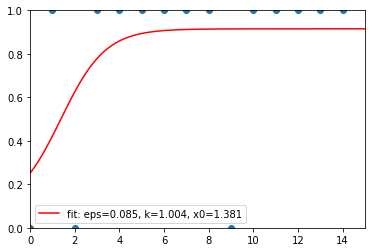

[0.05230932 1.4        0.42316078]


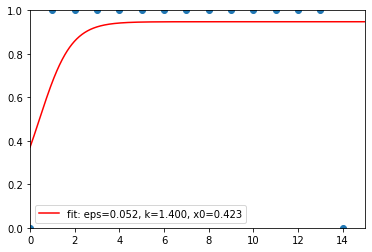

[0.         1.4        1.49655628]


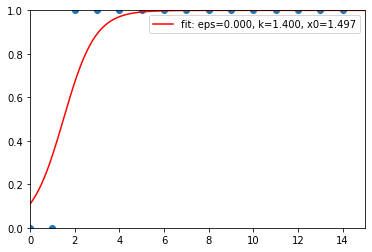

[0.         1.4        0.45056802]


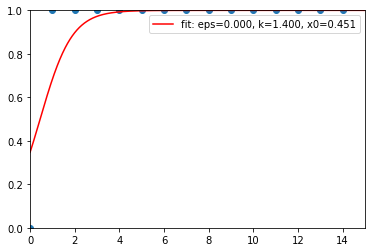

[0.         1.4        0.45056802]


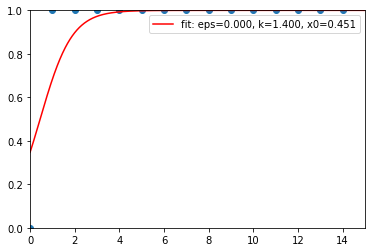

[0.         1.4        8.50000004]


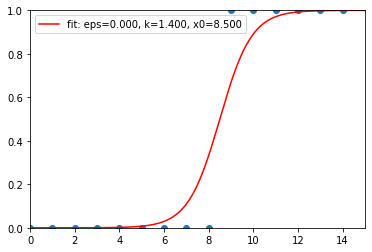

[0.         1.4        1.49655628]


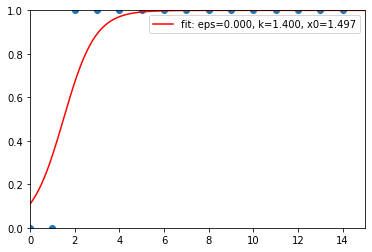

[0.         1.4        3.49998632]


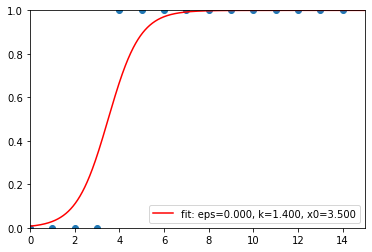

[0.04622185 1.4        1.49170931]


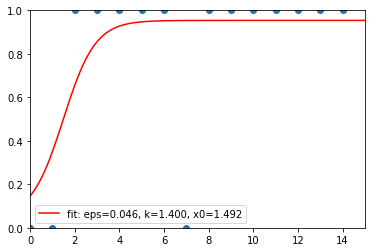

[ 0.   1.4 15. ]


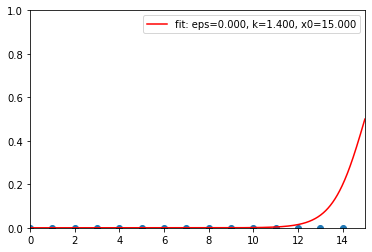

[0.05230931 1.4        0.42316112]


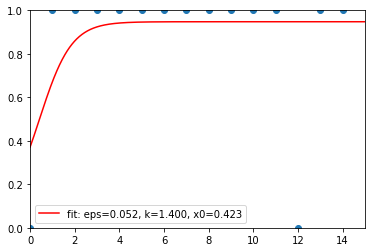

[ 0.   1.4 15. ]


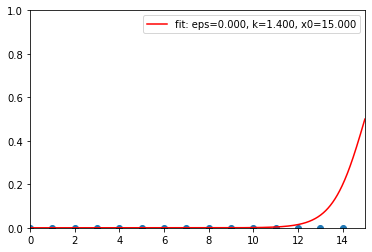

[0.         1.4        0.45056802]


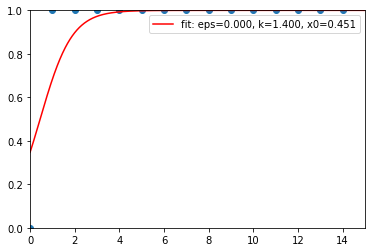

[0.         1.4        7.49999999]


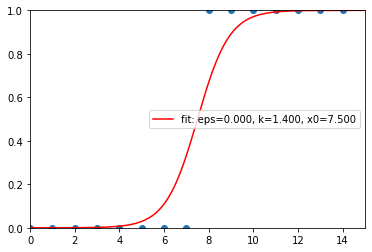

[0.         1.4        0.45056802]


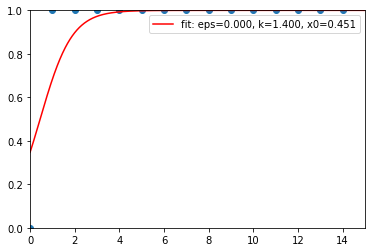

[0.         1.4        5.49999995]


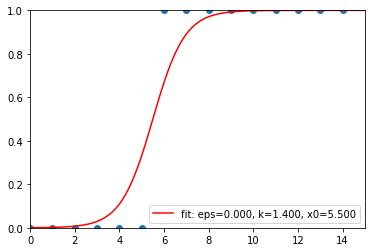

[ 0.   1.4 15. ]


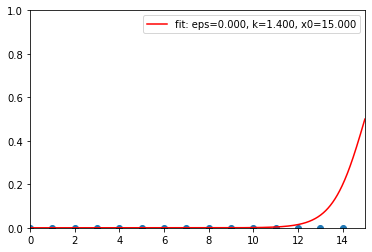

[ 0.          0.69592982 11.878662  ]


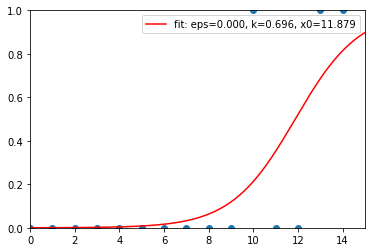

[0.         1.4        0.45056802]


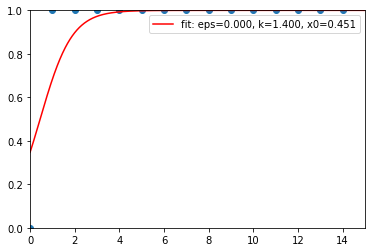

[0.        1.4       2.4997787]


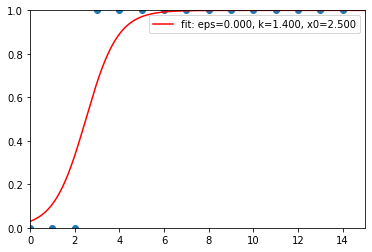

[0.         1.4        0.45056802]


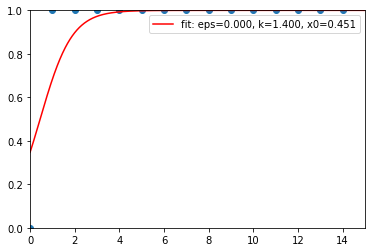

[ 0.          0.42664463 15.        ]


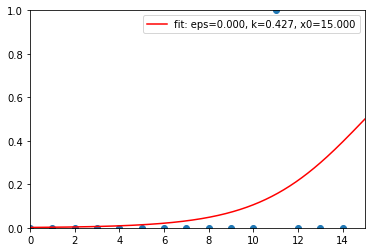

[0.13850562 1.4        0.        ]


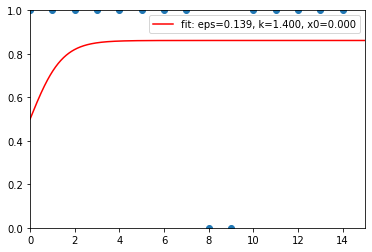

[0.05230932 1.4        0.42316081]


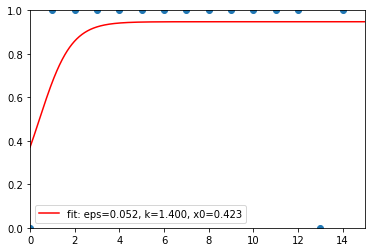

[ 0.   1.4 15. ]


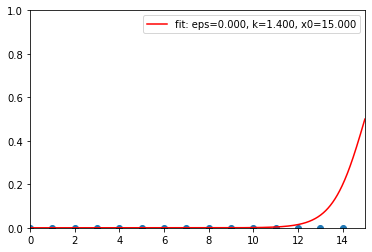

[0.         1.4        4.49999915]


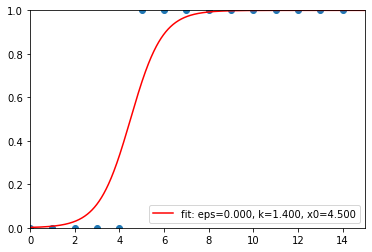

[0.  1.4 0. ]


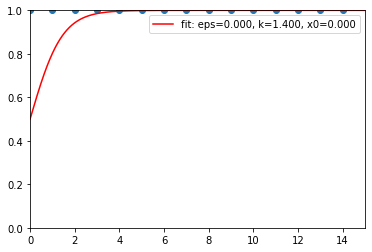

[0.         1.4        0.45056802]


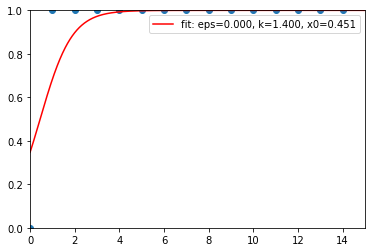

[ 0.   1.4 15. ]


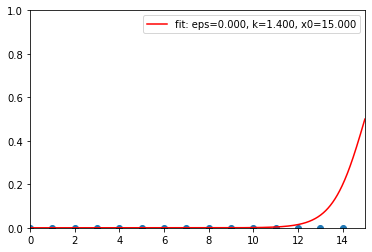

[0.         1.4        0.45056802]


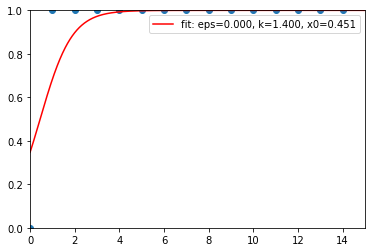

[0.         1.4        3.49998632]


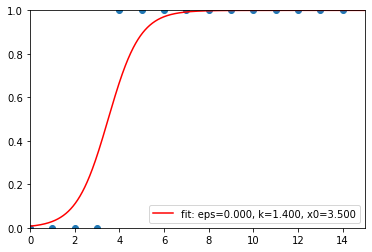

[0.         1.4        0.45056802]


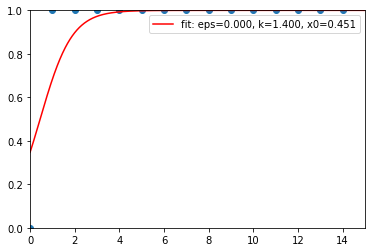

[0.         1.4        3.49998632]


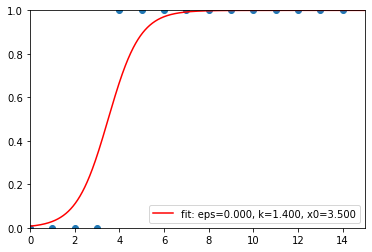

[0.05230932 1.4        0.42316078]


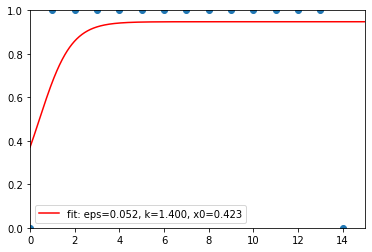

[0.         1.4        4.49999915]


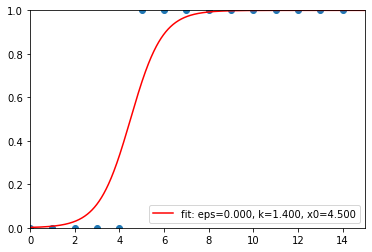

[0.12615203 1.4        4.49974321]


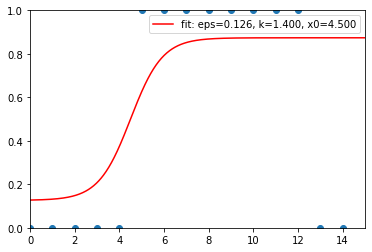

[0.5 1.4 0. ]


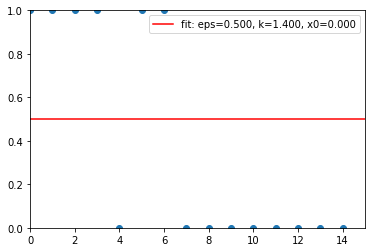

[0.         0.84871972 1.41241821]


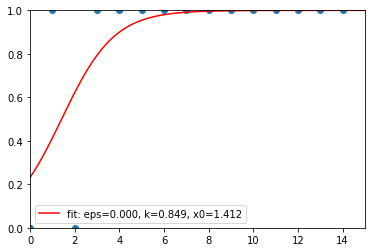

[0.5        1.4        0.76398968]


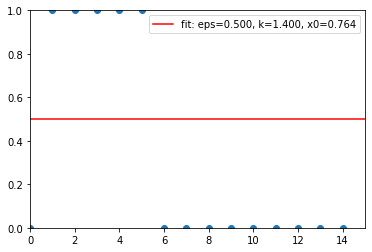

[0.         1.4        6.49999997]


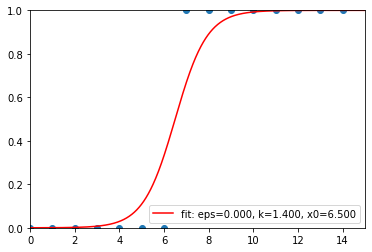

[0.         1.4        0.45056802]


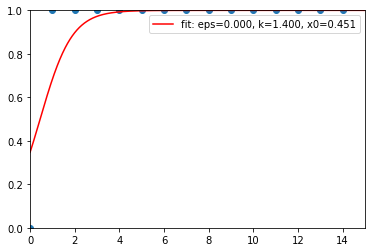

[0.20861237 1.4        2.49199967]


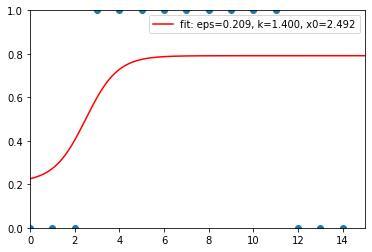

[0.04370542 1.4        6.49826055]


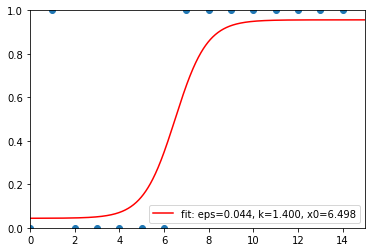

[0.12733138 1.4        1.48533625]


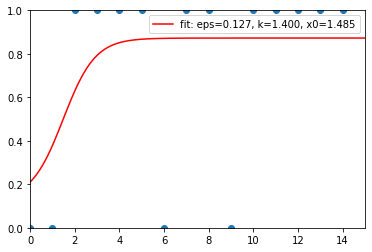

[0.         1.4        0.45056802]


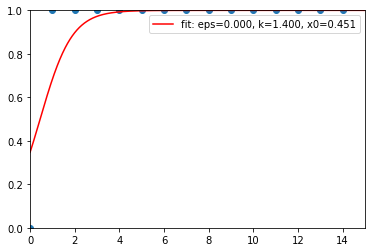

[ 0.   1.4 15. ]


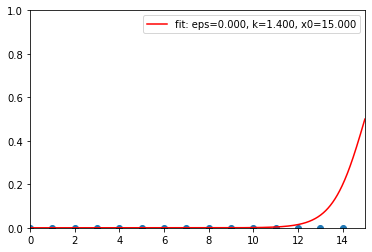

[0.06200501 1.4        0.        ]


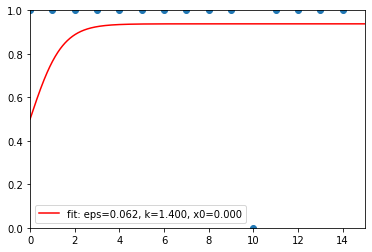

[0.20991643 1.4        0.32922842]


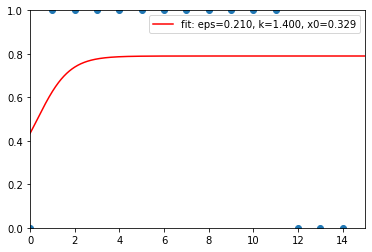

[0.         0.76441369 7.87313137]


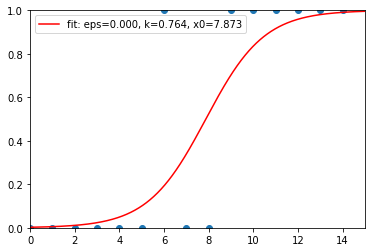

[0.5 1.4 0. ]


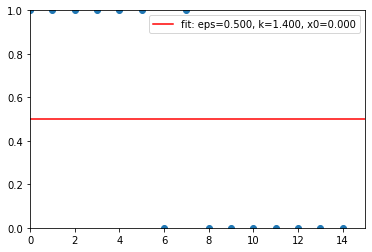

[0.06200513 1.4        0.        ]


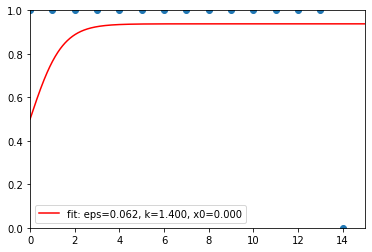

[ 0.          0.43261187 15.        ]


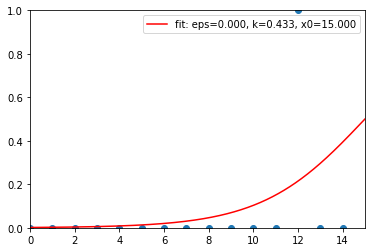

[0.         1.4        5.49999995]


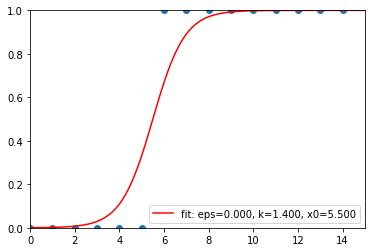

[0.         1.4        0.45056802]


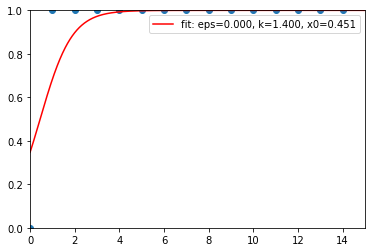

[0.         1.4        1.49655628]


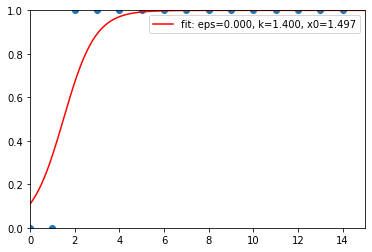

[ 0.   1.4 15. ]


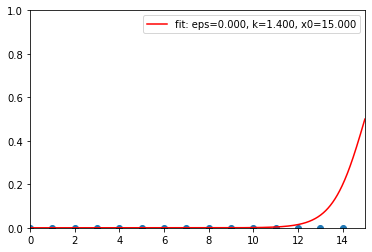

[ 0.   1.4 15. ]


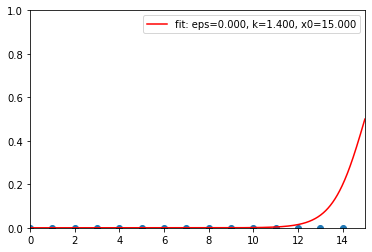

[0.         1.4        0.45056802]


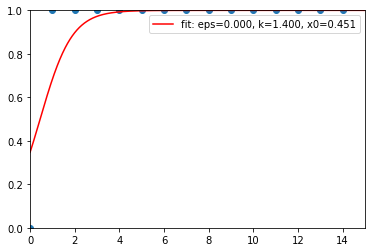

[0.        1.4       2.4997787]


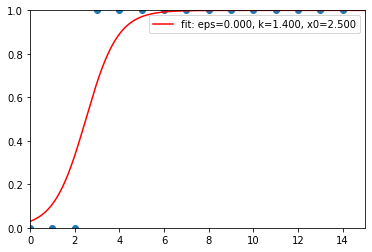

[0.05230803 1.4        0.42318895]


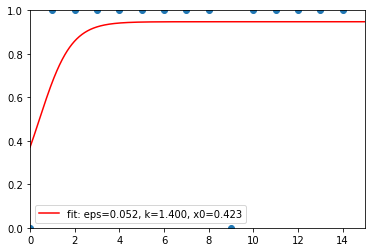

[0.         1.4        1.49655628]


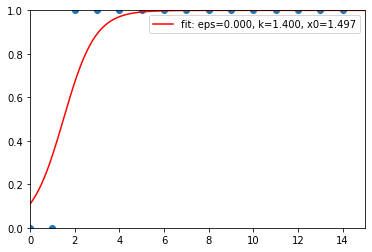

[0.         1.4        0.45056802]


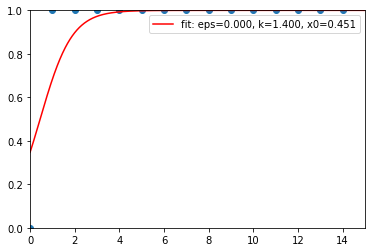

[0.         1.4        0.45056802]


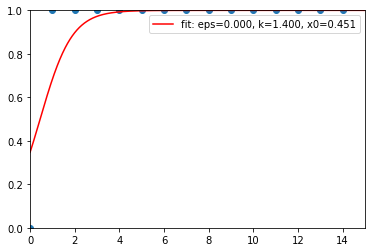

[ 0.   1.4 15. ]


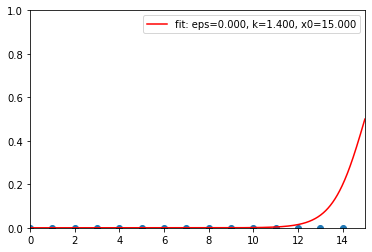

[0.5 1.4 0. ]


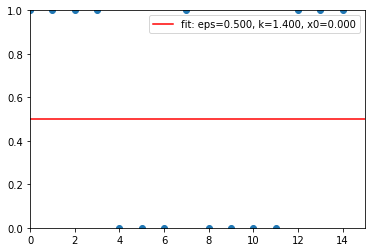

[ 0.   1.4 15. ]


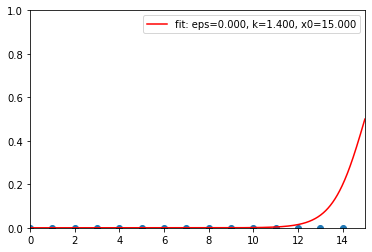

[0.0425455  1.4        5.47074454]


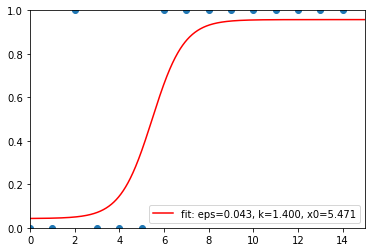

[ 0.   1.4 15. ]


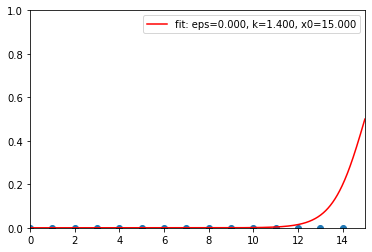

[0.         0.26482048 3.07054799]


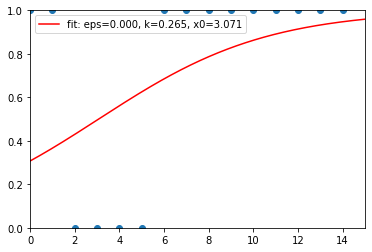

[0.         1.4        0.45056802]


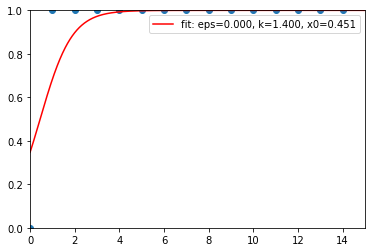

[0.        1.4       2.4997787]


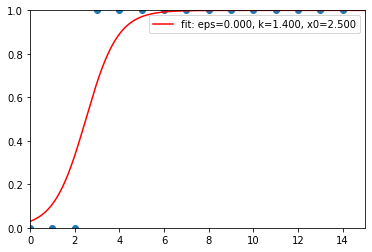

[0.         1.4        1.49655628]


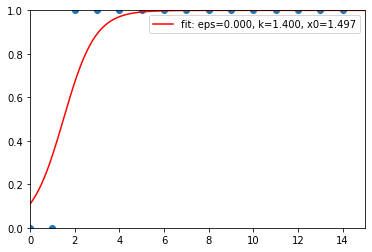

[0.36637038 1.4        0.21104824]


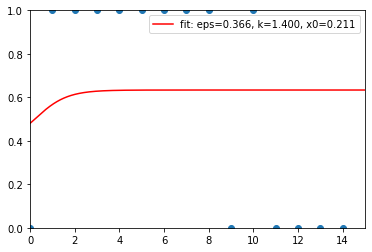

[0.         1.4        0.45056802]


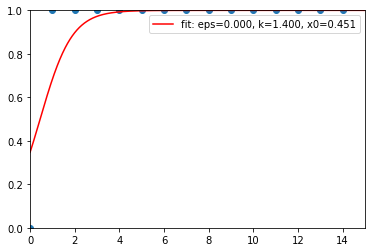

[0.         1.4        0.45056802]


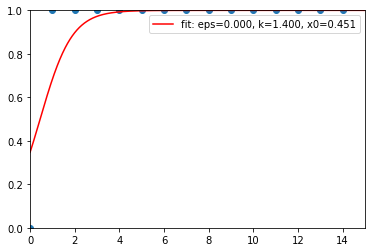

[ 0.          1.4        11.50022129]


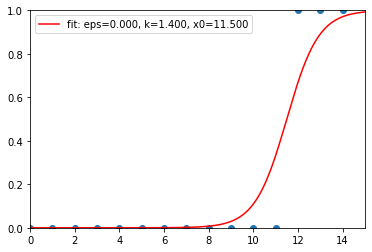

[0.44394576 1.4        0.        ]


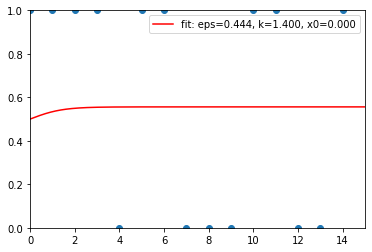

[ 0.   1.4 15. ]


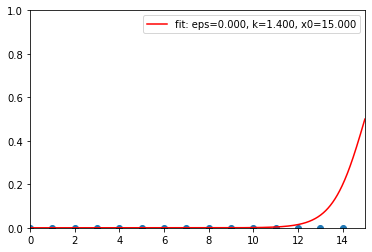

[ 0.          1.4        11.50022129]


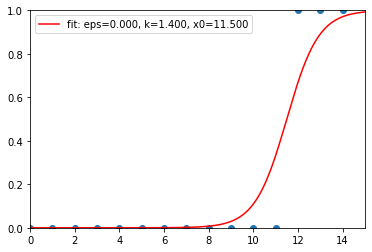

[0.         1.4        0.45056802]


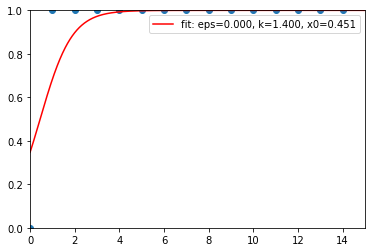

[0.         1.4        3.49998632]


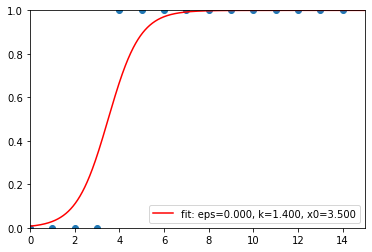

[0.         1.4        7.49999999]


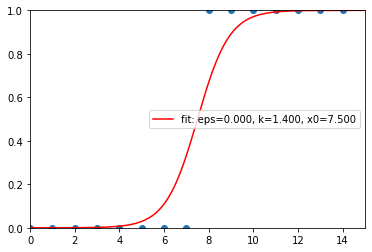

[0.        1.4       2.4997787]


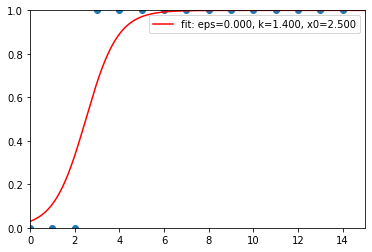

[0.         1.4        1.49655628]


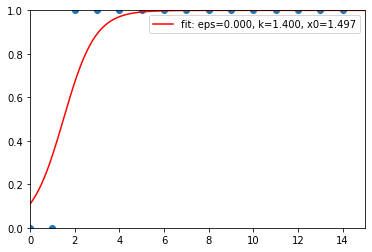

[0.         1.4        1.49655628]


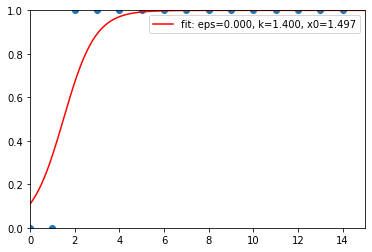

[0.         0.84871972 1.41241821]


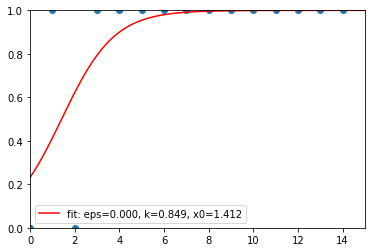

[ 0.   1.4 15. ]


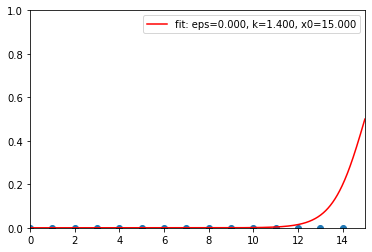

[0.         1.4        0.45056802]


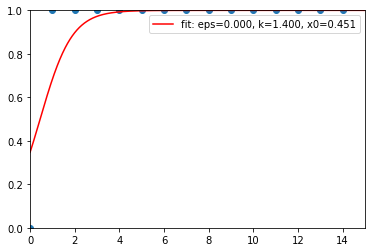

[0.         1.4        3.49998632]


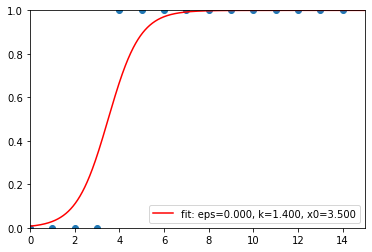

[0.         1.4        0.45056802]


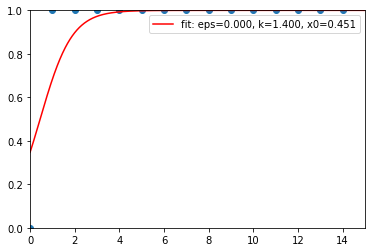

[0.04257754 1.4        4.47066798]


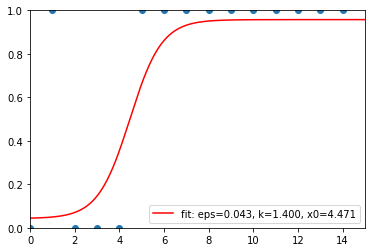

[0.         1.4        8.50000004]


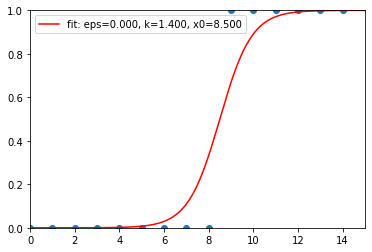

[0.         1.4        8.50000004]


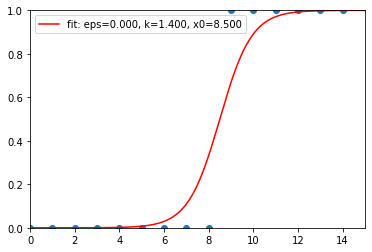

[0.         1.4        0.45056802]


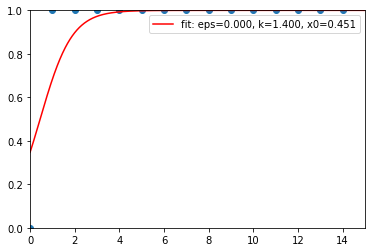

[0.20991643 1.4        0.32922842]


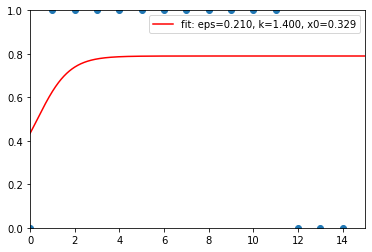

[0.         1.4        0.45056802]


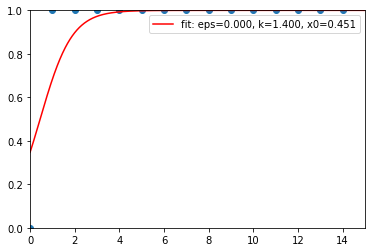

[0.         1.4        4.49999915]


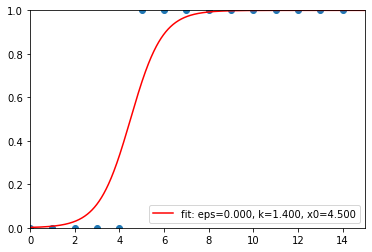

[0.         1.4        0.45056802]


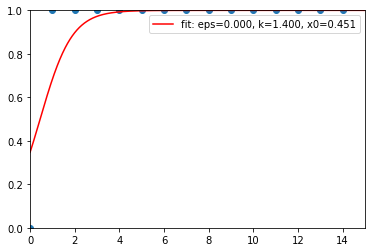

[0.05222324 1.4        0.42503232]


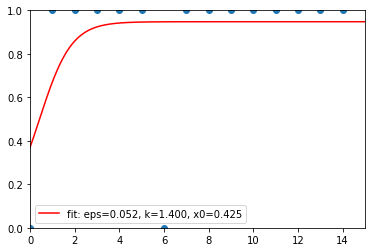

[0.         1.4        0.45056802]


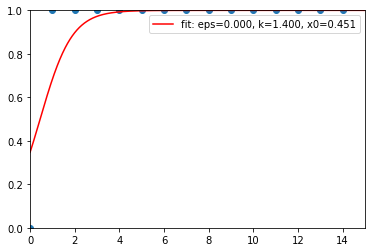

[0.04630112 1.4        1.48995791]


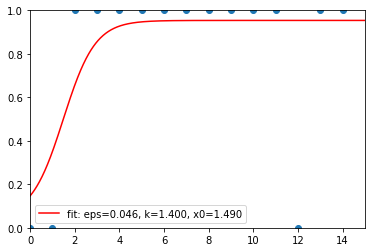

[0.         1.4        1.49655628]


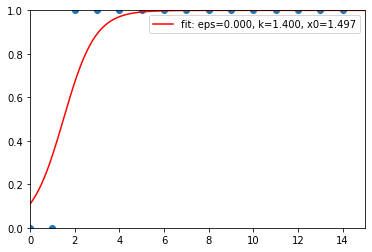

[0.05230932 1.4        0.42316078]


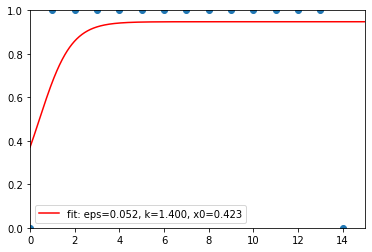

[ 0.   1.4 15. ]


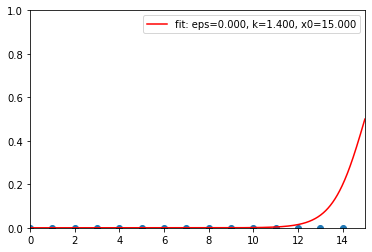

[0.         0.48607065 0.        ]


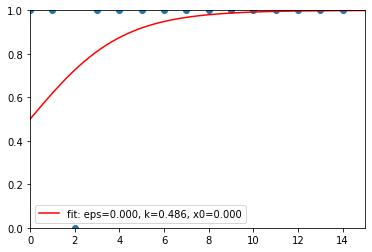

[0.5        1.21633163 6.17999478]


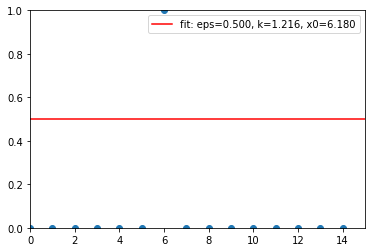

[0.28719526 1.4        0.3073861 ]


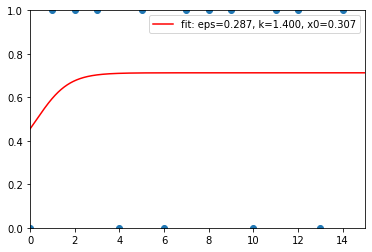

[0.04254508 1.4        8.52924746]


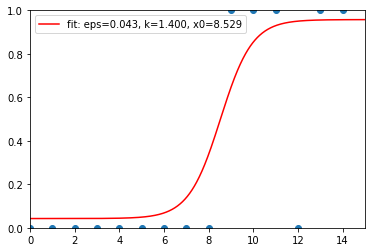

[0.20725211 1.4        3.52774056]


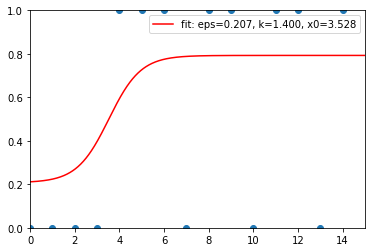

[0.28995556 1.4        1.46093077]


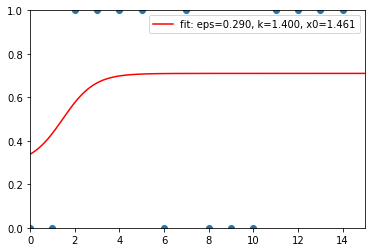

[0.29079364 1.4        3.4974256 ]


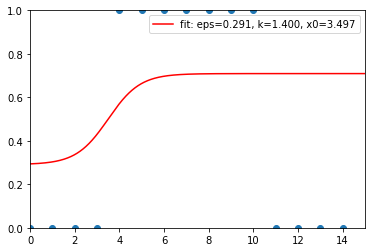

[ 0.   1.4 15. ]


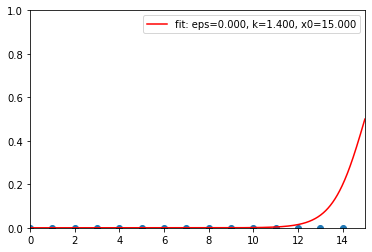

[0.         1.4        7.49999999]


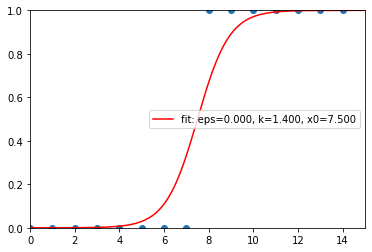

[0.12612939 1.4        5.50006176]


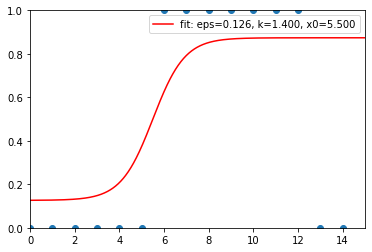

[ 0.          1.4        10.50001365]


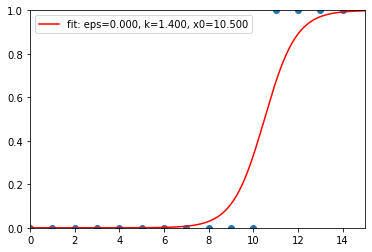

[0.04348385 1.4        5.49290754]


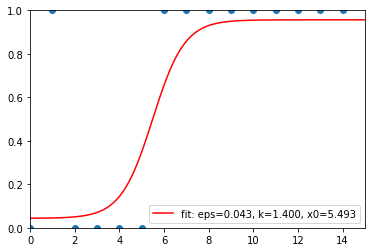

[ 0.          1.4        13.54943195]


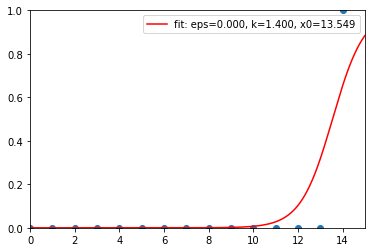

[0.21483542 1.4        0.        ]


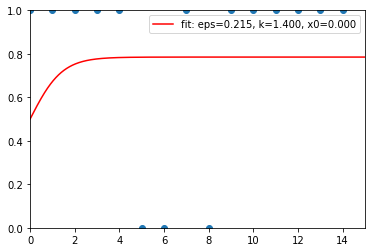

[0.04257429 1.4        9.47087385]


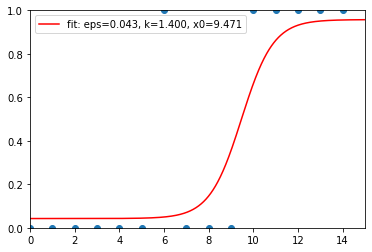

[0.21734212 0.52243445 0.        ]


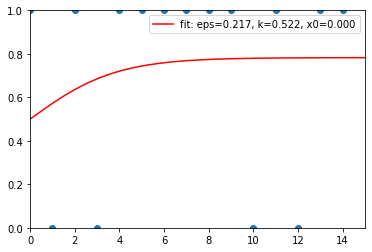

[0.29150382 1.4        0.        ]


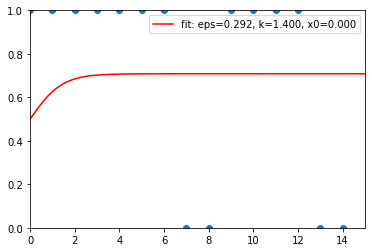

[0.04376874 1.4        5.50040282]


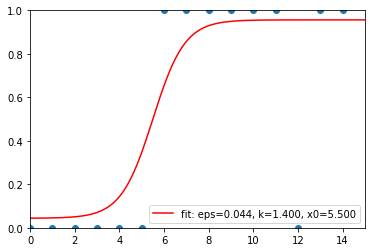

[0.08438433 1.10433059 4.50398071]


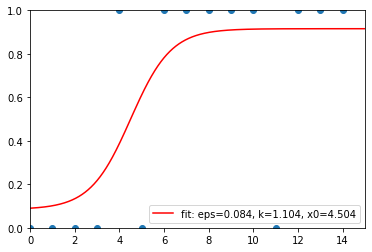

[0.28359653 1.4        8.68819774]


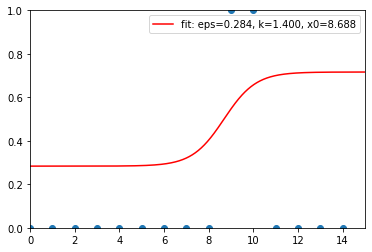

[0.         0.55478875 1.35387377]


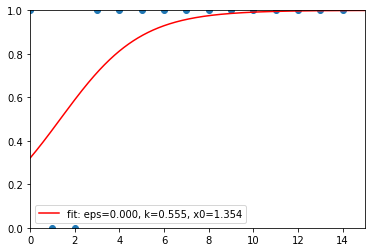

[0.         1.4        7.49999999]


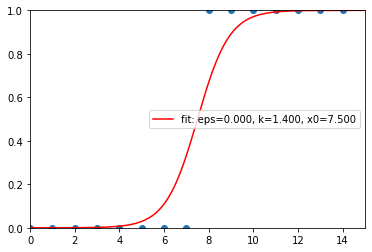

[0.29147148 1.4        0.        ]


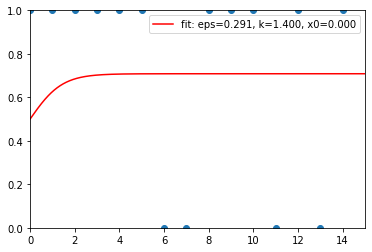

[ 0.05195932  1.4        13.56921677]


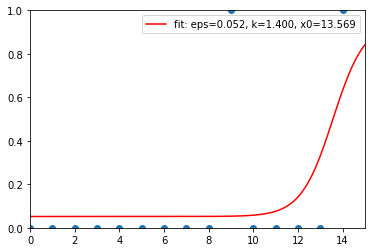

[0.04630119 1.4        1.4899565 ]


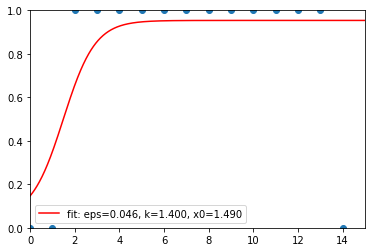

[0.36731382 1.4        0.        ]


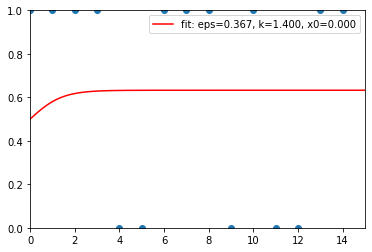

[0.         0.54656163 9.52059291]


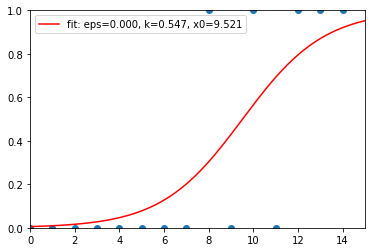

[ 0.          0.22992781 11.74186779]


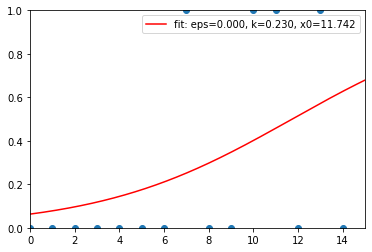

[0.5        1.16997902 1.15198287]


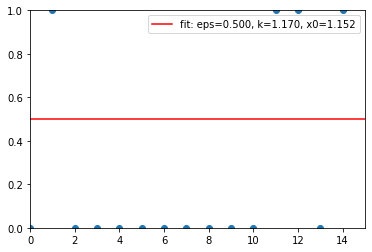

[0.        1.4       2.4997787]


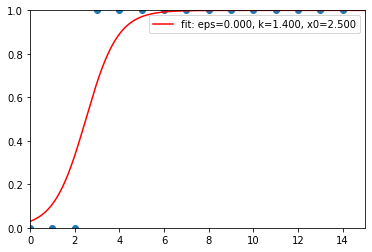

[0.         1.4        0.45056802]


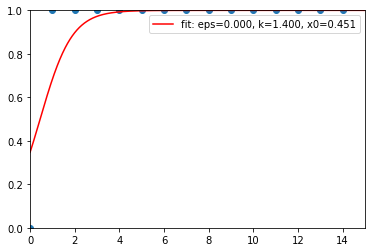

[0.         1.4        0.45056802]


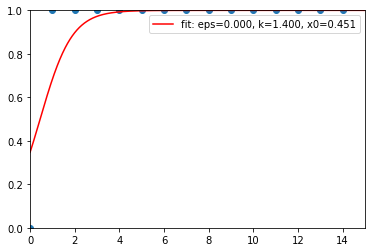

In [31]:
import matplotlib.pyplot as plt

x_bounds = (0, 15)
for block_idx in range(sig_feats.T.shape[1]):
    block_params = sig_feats.T[:3, block_idx]
    trial_data = trial_feats.T[:, block_idx]
    plt.plot(np.linspace(*x_bounds, num=1000),
             sigmoid(np.linspace(*x_bounds, num=1000), *block_params), 'r-',
             label='fit: eps=%5.3f, k=%5.3f, x0=%5.3f' % tuple(block_params))
    print(block_params)
    plt.scatter(range(15), list(trial_data))
    plt.xlim(x_bounds)
    plt.ylim([0, 1])
    plt.legend()
    plt.show()